##  PCA or T-SNE 
### Data dummies


In [9]:
import numpy as np

# Mock word2vec model
word2vec_model = {
    "global warming": np.array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]),
    "carbon": np.array([0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1, 0.0]),
    "emission": np.array([0.5, 0.4, 0.6, 0.7, 0.9, 0.3, 0.2, 0.8, 0.1, 0.2]),
    "temperature": np.array([0.6, 0.5, 0.4, 0.3, 0.2, 0.1, 0.0, 0.9, 0.8, 0.7]),
    "climate": np.array([0.3, 0.2, 0.1, 0.0, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4]),
    "pollution": np.array([0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1, 0.0, 0.9, 0.8]),
    "environment": np.array([1.0, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1])
}

In [12]:
# sample

word_vectors = np.array([
    [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
    [1.0, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1],
    [0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4],
    [1.4, 1.3, 1.2, 1.1, 1.0, 0.9, 0.8, 0.7, 0.6, 0.5],
    [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1]])

# Code

In [13]:

# Define a list of words related to climate change
words = ["global warming", "carbon", 
         "emission", "temperature", "climate", "pollution", "environment"]

# Extract vectors for these words
word_vectors = []
for word in words:
    if word in word2vec_model:
        word_vectors.append(word2vec_model[word])
    else:
        print(f"'{word}' not found in the corpus.")
        
word_vectors = np.array(word_vectors)



In [14]:
from sklearn.decomposition import PCA

# Apply PCA to reduce dimensions to 2
pca = PCA(n_components=2)
pca_result = pca.fit_transform(word_vectors)


In [1]:
from sklearn.manifold import TSNE

# Apply t-SNE to further reduce to 2 dimensions
tsne = TSNE(n_components=2, perplexity=2, random_state=0)
tsne_result = tsne.fit_transform(word_vectors)


NameError: name 'word_vectors' is not defined

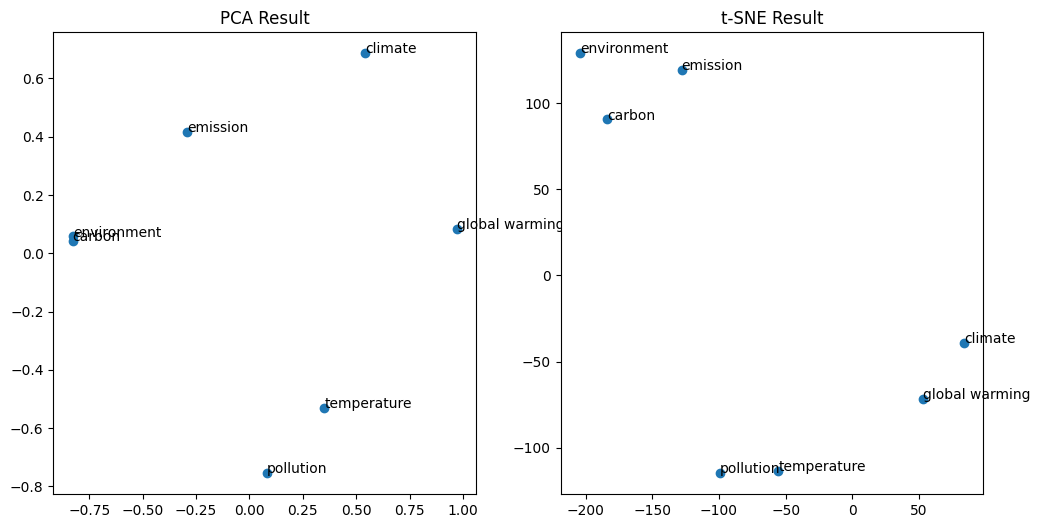

In [21]:
import matplotlib.pyplot as plt

# Plot the PCA results
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(pca_result[:, 0], pca_result[:, 1])
for i, word in enumerate(words):
    plt.annotate(word, (pca_result[i, 0], pca_result[i, 1]))
plt.title('PCA Result')

# Plot the t-SNE results
plt.subplot(1, 2, 2)
plt.scatter(tsne_result[:, 0], tsne_result[:, 1])
for i, word in enumerate(words):
    plt.annotate(word, (tsne_result[i, 0], tsne_result[i, 1]))
plt.title('t-SNE Result')

plt.show()


In [24]:
# Vector arithmetic example: "global warming" - "carbon" + "sustainability"
vector_result = word2vec_model["global warming"] - word2vec_model["carbon"] + word2vec_model["emission"]

# Find the most similar words to the resulting vector
similar_words = word2vec_model.most_similar(positive=[vector_result], topn=10)
print(similar_words)


AttributeError: 'dict' object has no attribute 'most_similar'

In [27]:
from gensim.models import Word2Vec
import numpy as np

# Sample corpus (just for illustration; use a larger corpus for real models)
sentences = [
    ["global", "warming", "is", "real"],
    ["carbon", "emissions", "affect", "climate"],
    ["sustainability", "is", "important", "for", "the", "environment"],
    ["reducing", "carbon", "footprint", "is", "necessary"],
    ["climate", "change", "affects", "global", "weather"],
]

# Train a Word2Vec model
word2vec_model = Word2Vec(sentences, vector_size=10, window=2, min_count=1, workers=4)

# Vector arithmetic example: "global warming" - "carbon" + "sustainability"
vector_result = word2vec_model.wv["global"] + word2vec_model.wv["warming"] - word2vec_model.wv["carbon"] + word2vec_model.wv["sustainability"]

# Find the most similar words to the resulting vector
similar_words = word2vec_model.wv.most_similar(positive=[vector_result], topn=10)
print(similar_words)




[('sustainability', 0.6737451553344727), ('warming', 0.6103216409683228), ('necessary', 0.539461612701416), ('real', 0.3275527060031891), ('for', 0.13539418578147888), ('reducing', 0.12924280762672424), ('affect', 0.03620903193950653), ('important', 0.011068981140851974), ('affects', -0.07437208294868469), ('weather', -0.10711359977722168)]
